## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [6]:
df=pd.read_csv('ab_data.csv') 
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [7]:
df.count()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

c. The number of unique users in the dataset.

In [8]:
df.nunique()['user_id']

290584

d. The proportion of users converted.

In [9]:
df['converted'].sum()/df['converted'].count()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [10]:
df.query('(group != "treatment" and landing_page == "new_page") or (group == "treatment" and landing_page == "old_page")')

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
776,820951,2017-01-04 02:42:54.770627,treatment,old_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1


f. Do any of the rows have missing values?

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [65]:
df2=df.query(' (group == "treatment" and landing_page != "old_page")')

df2=df2.append(df.query(' (group == "control" and landing_page != "new_page")'))

In [64]:

df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [63]:

df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0]

0

## `3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [15]:
df2.nunique()['user_id']

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
(df2[df2.duplicated('user_id',keep=False)])['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [17]:
df2[df2.duplicated('user_id',keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
# keeping one row of a duplicated user_id
df2=df2.drop_duplicates(['user_id'])
df2.count()

user_id         290584
timestamp       290584
group           290584
landing_page    290584
converted       290584
dtype: int64

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df2_control=df2.query('group=="control" ')
df2_control['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df2_treatment=df2.query('group=="treatment" ')
df2_treatment['converted'].mean()

0.11880806551510564

In [22]:
actual_diff=df2_treatment['converted'].mean()-df2_control['converted'].mean()
actual_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [23]:
df3=df2.query('landing_page=="new_page" ')

df3['landing_page'].count()/df2['landing_page'].count()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Since in the both case we see that the probability of conversion regardless of group is almost same 12% vs 11.9% we cannot say and there is no evidence that one page leads to more conversion than the other.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null Hypothesis: Conversion rate of the New Page is less than or equal to the Old Page.

H0 : Pnew <= Pold
H1 : Pnew > Pold

Alternative Hypothesis: Conversion rate of the New Page is greater than the Old Page.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [24]:
p_new=df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [25]:
p_old=df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
n_new=df2.query('landing_page=="new_page" ').count()['converted']
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [27]:
n_old=df2.query('landing_page=="old_page" ').count()['converted']
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
new_page_converted=np.random.choice([0,1],size=n_new,p=[(1-p_new),p_new])
new_page_converted

array([0, 1, 0, ..., 1, 1, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted=np.random.choice([0,1],size=n_old,p=[(1-p_old),p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
new_page_converted.mean()-old_page_converted.mean()

-0.00066257412338575905

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [31]:
p_diffs=[]
for _ in range(10000):
    new_page_converted_simulated=np.random.choice([0,1],size=n_new,p=[(1-p_new),p_new])
    old_page_converted_simulated=np.random.choice([0,1],size=n_old,p=[(1-p_old),p_old])
    p_diffs.append(new_page_converted_simulated.mean()- old_page_converted_simulated.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

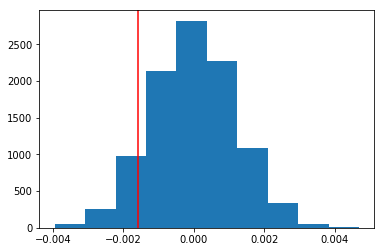

In [32]:
plt.hist(p_diffs);
plt.axvline(x=actual_diff,color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
p_diffs=np.array(p_diffs)
p_value=(p_diffs > actual_diff).mean()
p_value

0.90869999999999995

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

This is pvalue.
A pvalue is the probability of getting the results you did (or more extreme results) given that the null hypothesis is true.
so a very large p-value indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis which suggest to keep the old page

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page" ')['converted'].sum()
convert_new = df2.query('landing_page=="new_page" ')['converted'].sum()
n_old = df2.query('landing_page=="old_page" ')['converted'].count()
n_new = df2.query('landing_page=="new_page" ')['converted'].count()

In [35]:

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)


1.31092419842 0.905058312759


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [36]:
from scipy.stats import norm
# Tells us how significant our z-score is
print(norm.cdf(z_score))

# for our single-sides test, assumed at 95% confidence level, we calculate: 
print(norm.ppf(1-(0.05)))

0.905058312759
1.64485362695


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Since p-value of 0.90 is greater than the alpha value of 0.05, we fail to reject the null hypothesis. Therefore, We fail to reject the null hypothesis.Therefore, we recommend to keep the old page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [66]:
# To create intercept for the model
df2['intercept']=1

df2[['control','ab_page']]=pd.get_dummies(df2['group'])

df2.drop(['control'],axis=1,inplace=True)

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [67]:

logit_reg=sm.Logit(df2['converted'],df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
results=logit_reg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 24 Jan 2019   Pseudo R-squ.:               8.077e-06
Time:                        10:41:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value associated with ab_page is 0.19 which is greater than alpha (0.05)
(A/B Test): Here the null hypothesis denotes an user receiving the new page has lesser or equal conversion rate than the old page.Aternate hypothesis denotes an user receiving the new page has higher conversion rate than old page.
(Logistic Regression): Here the null hypothesis denotes no relationship between which page an user is shown and conversion rate.Alternate hypothesis denotes some relationship between a page shown to a user and the conversion rate.
Conclusion: Null hypothesis of Part II and Part III are different. Hence, p-values are different from each other.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Yes, it is a good idea to consider other factors to add into the regression model. This will help us to improve the logistic regression. It will also help us to gain additional insights than a simple analysis. Things like which program people applying for or age or gender of user might influence whether or not an individual converts or not to new page.. Disadvantages: At times, adding additional factors may mislead our regression model. Also we may have a risk of misinterpretating the model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [57]:
#Importing the Countries datset
df_countries=pd.read_csv('countries.csv')
# showing the top 5 rows
df_countries.head(5)
# Joining the countries dataset to the df2 dataset
df_final_cnt=df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
# showing the top 5 rows
df_final_cnt.head(5)

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [58]:
# To create the dummy variables of country
df_final_dummies=pd.get_dummies(df_final_cnt['country'])
# joining the dummies to the df_final dataset
df_final_cnt=df_final_cnt.join(df_final_dummies)
# showing top 5 rows
df_final_cnt.head(5)

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [59]:
# Logistic regression model
logit_reg_final=sm.Logit(df_final_cnt['converted'],df_final_cnt[['intercept','ab_page','US','UK']])
                                                         
results_final=logit_reg_final.fit()
results_final.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 24 Jan 2019   Pseudo R-squ.:               2.323e-05
Time:                        11:10:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

In [46]:
# Getting the real coefficients
print('Coef of US: {}'.format(np.exp(0.0408)))
print('Coef of UK: {}'.format(np.exp(0.0506)))

Coef of US: 1.0416437559600236
Coef of UK: 1.0519020483004984


Canada is considered as a baseline since it is one of the variables that
was not added in the logistic regresion. So, US users are 1.04 times more likely to convert
than Canada users and UK users are 1.05 times more likely to convert than canada users. Since p-
values for both US and UK are more than alpha(0.05), it is not significant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [60]:
# To know the interaction between page and country.

df_final_cnt['US_new']=df_final_cnt['ab_page']*df_final_cnt['US']
df_final_cnt['UK_new']=df_final_cnt['ab_page']*df_final_cnt['UK']
df_final_cnt['CA_new']=df_final_cnt['ab_page']*df_final_cnt['CA']
df_final_cnt.head(5)

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,US_new,UK_new,CA_new
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [61]:
# Logistic regression model
logit_reg_final_new=sm.Logit(df_final_cnt['converted'],df_final_cnt[['intercept','ab_page','US','UK','UK_new','US_new']])
# To see the summary
results_final_new=logit_reg_final_new.fit()
results_final_new.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 24 Jan 2019   Pseudo R-squ.:               3.482e-05
Time:                        11:10:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
UK_new         0.0783      0.057      1.378      0.168      -0.033       0.190
US_new         0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

In [62]:
#Since we are using interactions between country and Pages. 
#It is also better to create linear model as well.
linear_reg_final=sm.OLS(df_final_cnt['converted'],df_final_cnt[['intercept','ab_page','US','UK','UK_new','US_new']])
results_final_linear=linear_reg_final.fit()
results_final_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.466
Date:                Thu, 24 Jan 2019   Prob (F-statistic):              0.197
Time:                        11:10:48   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290578   BIC:                         1.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1188      0.004     31.057      0.000       0.111       0.126
ab_page       -0.0069      0.005     -1.277      0.202      -0.017       0.004
US             0.0018      0.004      0.467      0.641      -0.006       0.010
UK             0.0012      0.004      0.296      0.767      -0.007       0.009
UK_new         0.0080      0.006      1.360      0.174      -0.004       0.020
US_new         0.0047      0.006      0.845      0.398      -0.006       0.016
==============================================================================
Omnibus:                   125549.436   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414285.945
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: 
Since p-values for US, UK, US_new, UK_new are more than alpha(0.05), it is not
statistically significant. Using linear regression and found that the p-values for all  US, UK, US_new, and
UK_new are higher than alpha(0.05). Therefore, it is not statistically significant. Also R square
of a linear model is zero, it is not a good model.


In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0